In [1]:
# Create Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn't actually connect to our database; it just prepares the database file to be connected to later on.
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# SQLAlchemy Automap Base
# Next we're going to reflect our existing database into a new model. Reflecting a database into a new model essentially means to transfer the contents of the database into a different structure of data. 

Base = automap_base()

In [4]:
# SQLAlchemy Reflect Tables
# Now that we've gotten our environment set up for SQLAlchemy, we can reflect our tables with the prepare() function. By adding this code, we'll reflect the schema of our SQLite tables into our code and create mappings.

Base.prepare(engine, reflect=True)


In [5]:
# View Classes Found by Automap. this code references the classes that were mapped in each table. The code we will run below enables us to essentially copy, or reflect, our data into different classes instead of database tables.
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save References to Each Table
# Now that we've viewed all of our classes, we can create references to each table.

Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create Session Link to the Database
# First, we'll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data
session = Session(engine)

In [8]:
# 9.2.1 Retrieve the Precipitation Data
# Find the Date One Year Ago
# Add the most recent date, August 23, 2017, This code specifies the most recent date, but we want to calculate the date one year back
prev_year = dt.date(2017, 8, 23)

# add the dt.timedelta() function to the previous line of code
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)



In [9]:
# Retrieve the Precipitation Scores
# We'll begin by creating a variable to store the results of the query we'll write. This variable will be called results:

results = []

In [10]:
# Next, let's add our session that we created earlier so that we can query our database. For this we'll use the session.query() function, which is how we'll begin all of our queries in SQLAlchemy
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [11]:
# Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date. We'll use the filter() function to filter out the data we don't need. Add the filter() function to the existing query.

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

In [12]:
# One last thing: we'll add a function that extracts all of the results from our query and put them in a list. To do this, add .all() to the end of our existing query. All said and done, your query should look something like this:

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [13]:
# 9.2.2 Save Query Results
# In order to access it in the future, we'll save it to a Python Pandas DataFrame
df = pd.DataFrame(results, columns=['date','precipitation'])


In [14]:
# Use the set_index() Function
# We can use the variable inplace to specify whether or not we want to create a new DataFrame. By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications.

df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [15]:
# print the DataFrame without the index so we can see just the date and precipitation.
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [16]:
# Sort the DataFrame - sort the values by date using the sort_index() function.

df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:xlabel='date'>

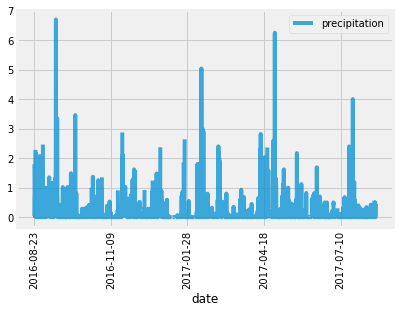

In [20]:
# Plot the Data
#df.plot()
df.plot(alpha=0.75,rot=90)

In [21]:
# 9.2.5 Generate the Summary
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Find the Number of Stations. We need to write a query to get the number of stations in our dataset. We'll use our session that we created earlier to query our database.
# Begin by adding the starting point for our query, which is the following line
session.query()



In [23]:
# Continuing with our query, we'll use func.count, which essentially counts a given dataset we are interested in. In this case, we want to count the total number of stations. We can do this by referencing Station.station, which will give us the number of stations. Add the query parameters to your code, like this:

session.query(func.count(Station.station))

In [24]:
# Now we need to add the .all() function to the end of this query so that our results are returned as a list. Your final query should look like the following:
session.query(func.count(Station.station)).all()

[(9,)]

In [26]:
# Determine the Most Active Stations
# Begin with the function we use to start every query in SQLAlchemy
session.query()

In [27]:
# Next, we need to add a few parameters to our query. We'll list the stations and the counts, like this

session.query(Measurement.station, func.count(Measurement.station))


In [29]:
# We want to group the data by the station name, and then order by the count for each station in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)

In [30]:
# Now let's add the order_by function. This function will order our results in the order that we specify, in this case, descending order. Our query results will be returned as a list.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [31]:
# Now we need to add the .all() function here as well. This will return all of the results of our query. This is what your query should look like:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# 9.3.3 Find Low, High, and Average Temperatures
# work on our temperature analysis! We'll be using the results from our last query, which gave us the most active station, to gather some basic statistics
# Like our previous queries, we'll begin with this line of code

session.query()

In [33]:
# we will calculate the minimum, maximum, and average temperatures with the following functions: func.min, func.max, and func.avg. 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

In [34]:
# If you look at the outcome of the previous query, you can see that the most active station is USC00519281. Therefore, we will need to add this station ID to our filter
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')

In [35]:
# Finally, add the .all() function to return our results as a list. Here's what your final query should look like
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [36]:
# 9.3.4 Plot the Highest Number of Observations
# We need to create a plot that shows all of the temperatures in a given year for the station with the highest number of temperature observations.
# Create a Query for the Temperature Observations

session.query(Measurement.tobs)

In [37]:
# Now filter out all the stations except the most active station with filter(Measurement.station == 'USC00519281'). 
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')


In [39]:
# We need to apply another filter to consider only the most recent year. For this we can reuse some of the code we have written previously. Then we'll add the .all() function to save our results as a list.
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [43]:
# Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


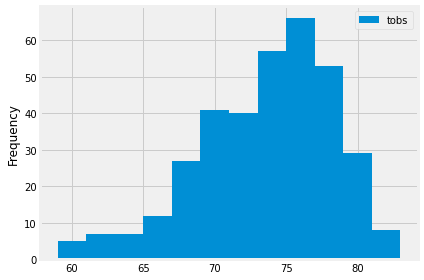

In [48]:
# Plot the Temperature Observations
df.plot.hist(bins=12)
plt.tight_layout()